<a href="https://colab.research.google.com/github/sydneynichol/MyFirstPullRequest/blob/master/Data_Wrangling_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Wrangling with R - Exercise 2

Today's goal is to practice some of the basics of working with data using R's [tidyverse](https://www.tidyverse.org/) environment.

To submit this assignment, please:
- make a copy of this notebook
- share it with me (mzettersten@ucsd.edu)
- submit a share link of the completed assignment on Canvas

For .5 extra credit, complete the following bonus questions:
- 1.7
- 2.4



##0. Setting Up: Loading the tidyverse packages
Before working through this notebook, make sure that your runtime is set to use R (rather than python). This should be set already, but you can double-check by selecting the following from the menu at the top of the notebook.

  Runtime > Change runtime type

Then make sure that R appears in the drop-down menu under runtime type.

This first part of the code just installs and loads the R packages we want to use for the following analyses.

In [1]:
#Install packages we want to use

#this loads a helper function for installing R packages
source('https://raw.githubusercontent.com/COGS119/tutorials/refs/heads/main/R/load_install_packages.R')

#specify the name of all packages we want to use her
packages_to_apt_install = c('tidyverse')

#install packages specified above (note that we're using our old friend the for loop, this time in R syntax) into our google colab environment
#For more: https://www.w3schools.com/r/r_for_loop.asp
for (package in packages_to_apt_install) load_install_package(package, apt=TRUE)

#load packages we want to use
library(tidyverse)

#set some basic plotting defaults
theme_set(theme_minimal(base_size = 18))

#check the version of R used
print(R.version.string)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "R version 4.4.2 (2024-10-31)"


## 1. Practice working with Experiment Data

Let's pick up where we left off last time, working with a (cleaned-up) version of the type of data you'll be working with in your experiment. [NOTE: Most of Section 1 is designed to be very similar to [Data Wrangling Exercise 1, Section 4](https://colab.research.google.com/drive/1ndgXH2X3WUkHbnuH3MM5cerWx9_2Hj-n?usp=sharing) - feel free to consult the code there frequently!]

This data is from [Zettersten & Lupyan (2020)](https://drive.google.com/file/d/1kpNFFcPdA9XiL4jseJtnrE3gdUOWkg66/view?usp=drive_link) (one of the experiments not chosen for a project).

Reminder: In the experiment, participants figure out which of two categories (A or B) a given image belongs to through trial and error. Over time (24 trials, organized into three blocks of 8 trials each), they start to learn the category structure. The key manipulation is a between-subjects condition: in the high nameability condition, the features of the images (in this case, colors) are very easy to name (e.g., blue, orange). In the low nameability condition, the colors are very difficult to name (e.g., sienna, mauve). The finding is that categories were easier to learn when the color features were more nameable.

The data here presents the **actual** data from the first two experiments in the paper (1A and 1B). The experiments are structurally identical - they just use slightly different arrangements of colors.

### 1.1. Read in the data

In [2]:
#read in the data we'll use
#data from: Zettersten & Lupyan (2020)
#https://drive.google.com/file/d/1kpNFFcPdA9XiL4jseJtnrE3gdUOWkg66/view?usp=drive_link
nameability_data <- read_csv("https://raw.githubusercontent.com/COGS119/tutorials/refs/heads/main/R/nameability_exercise.csv")

Rows: 2400 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experiment, subject, condition, image_name
dbl (3): total_trial_num, block_num, is_right

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 1.2. Understand the structure of the data

First, let's understand how our data is structured. Here's another way to take a first peek at your data.

In [3]:
nameability_data |> View()

experiment,subject,condition,total_trial_num,block_num,image_name,is_right
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1A,p150212,low,1,1,low_B_111,1
1A,p150212,low,2,1,low_A_000,1
1A,p150212,low,3,1,low_A_000,1
1A,p150212,low,4,1,low_B_110,1
1A,p150212,low,5,1,low_B_101,0
1A,p150212,low,6,1,low_B_111,1
1A,p150212,low,7,1,low_A_001,0
1A,p150212,low,8,1,low_A_010,1
1A,p150212,low,9,2,low_B_110,1


The data contains the following columns:

* **experiment**: the name of the experiment in the paper (1A or 1B)
* **subject**: the unique participant id
* **condition**: nameability condition (high or low)
* **total_trial_num**: the trial number (1-24)
* **block_num**: the block number (3 blocks of 8 trials each)
* **image_name**: the name of the stimulus to be categorized
* **is_right**: whether the response was correct (is_right=1) or incorrect (is_right=0)

Is the data in tidy format? Why/ why not?

answer: yes it's quite tidy since each variable is in its own column, each observation is in its own row, and each type of observational unit forms a nice table.

###1.3. Summarize the data from Experiment 1B

Let's **summarize the average accuracy for each participant from Experiment 1B only**, retaining information about which condition they were in.

To do so, we need to:
* filter the data to Experiment 1B
* group the data by condition (why?) and participant
* summarize the average accuracy

In [6]:
#create a data frame summarizing the average accuracy for each participant for Experiment 1B
data_1B <- nameability_data[nameability_data$experiment == "1B", ]

experiment_1B_summary <- data_1B %>%
  group_by(condition, subject) %>%
  summarize(avg_accuracy = mean(is_right, na.rm = TRUE), .groups = 'drop')

print(experiment_1B_summary)

# A tibble: 50 × 3
   condition subject avg_accuracy
   <chr>     <chr>          <dbl>
 1 high      p118304        0.667
 2 high      p152554        0.75 
 3 high      p196101        0.75 
 4 high      p297840        0.917
 5 high      p388613        0.917
 6 high      p437765        0.917
 7 high      p442943        0.833
 8 high      p452770        0.875
 9 high      p470610        0.875
10 high      p521566        0.792
# ℹ 40 more rows


###1.4. Plot the data

Create a plot to show the distribution of participants' accuracy in each condition. This could take several forms: histogram, jittered points, a dotplot,... entirely up to you!

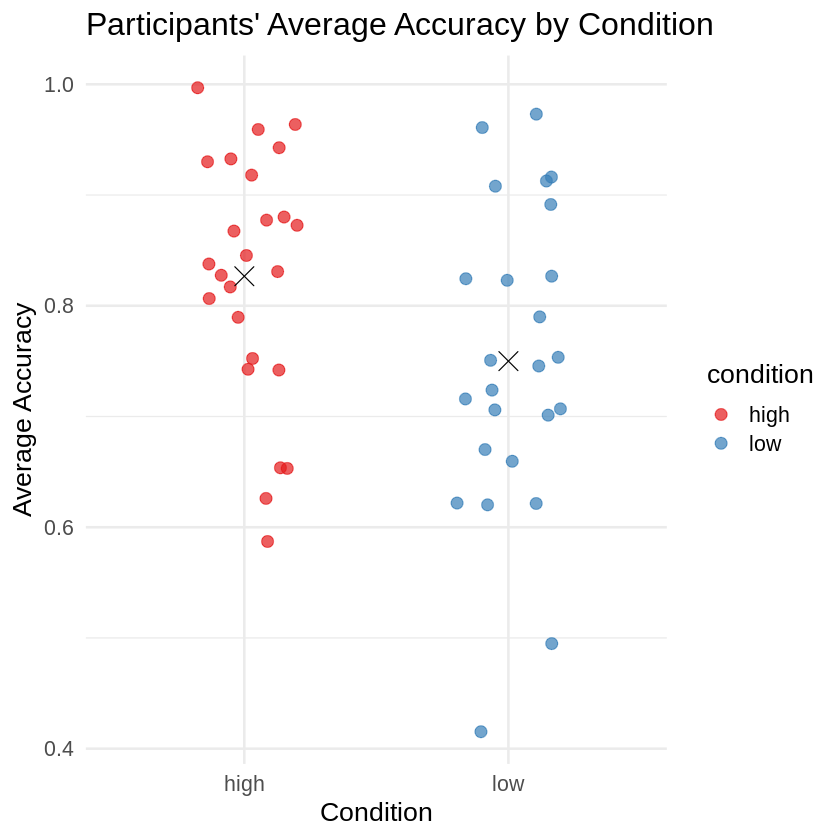

In [8]:
#create a plot to show the distribution of participants' average accuracy in each condition
experiment_1B_summary %>%
  ggplot(aes(x = condition, y = avg_accuracy, color = condition)) +
  geom_jitter(width = 0.2, size = 3, alpha = 0.7) +
  stat_summary(fun = mean, geom = "point", shape = 4, size = 5, color = "black") +
  labs(
    title = "Participants' Average Accuracy by Condition",
    x = "Condition",
    y = "Average Accuracy"
  ) +
  scale_color_brewer(palette = "Set1") +
  theme_minimal(base_size = 16)

###1.5. Summarize accuracy by image (instead of participant)

Let's summarize the data from Experiment 1B a different way.

Instead of summarizing by participant, let's **summarize the average accuracy for each IMAGE** from Experiment 1B, retaining information about which condition they were in.

To do so, we need to:
* filter the data to Experiment 1B
* group the data by condition and image
* summarize the average accuracy

In [9]:
#create a data frame summarizing the average accuracy for each IMAGE for Experiment 1B
data_1B <- nameability_data[nameability_data$experiment == "1B", ]

image_summary <- data_1B %>%
  group_by(condition, image_name) %>%
  summarize(avg_accuracy = mean(is_right, na.rm = TRUE), .groups = "drop")

print(image_summary)

# A tibble: 12 × 3
   condition image_name avg_accuracy
   <chr>     <chr>             <dbl>
 1 high      high_A_000        0.927
 2 high      high_A_001        0.733
 3 high      high_A_010        0.693
 4 high      high_B_101        0.773
 5 high      high_B_110        0.773
 6 high      high_B_111        0.893
 7 low       low_A_000         0.833
 8 low       low_A_001         0.76 
 9 low       low_A_010         0.613
10 low       low_B_101         0.493
11 low       low_B_110         0.693
12 low       low_B_111         0.887


Now, create a plot showing the distribution of image accuracies.

**In a comment in your code, please answer the following questions:**

- What is the image with the lowest overall accuracy in Experiment 1B?
- What is the image with the highest overall accuracy in Experiment 1B?

# A tibble: 1 × 3
  condition image_name avg_accuracy
  <chr>     <chr>             <dbl>
1 low       low_B_101         0.493
# A tibble: 1 × 3
  condition image_name avg_accuracy
  <chr>     <chr>             <dbl>
1 high      high_A_000        0.927


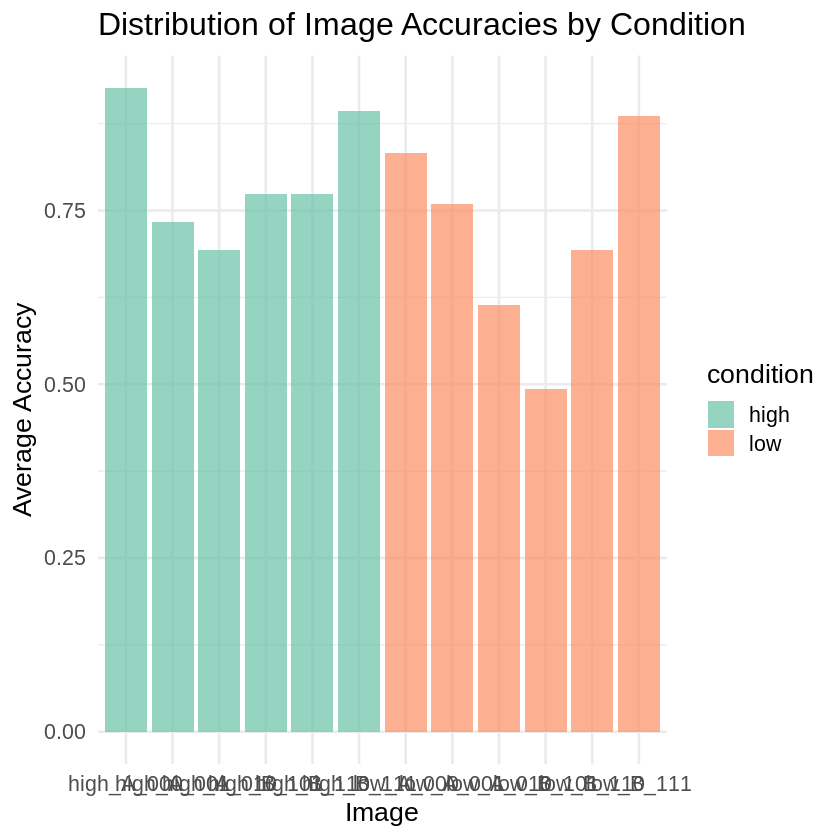

In [11]:
#create a plot showing the distribution of image accuracies

# What is the image with the lowest overall accuracy in Experiment 1B? --> The image with the lowest overall accuracy is low_B_101, with an average accuracy of 0.493.

# What is the image with the highest overall accuracy in Experiment 1B? --> The image with the highest overall accuracy is high_A_000, with an average accuracy of 0.927.

image_summary %>%
  ggplot(aes(x = image_name, y = avg_accuracy, fill = condition)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +
  labs(
    title = "Distribution of Image Accuracies by Condition",
    x = "Image",
    y = "Average Accuracy"
  ) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_fill_brewer(palette = "Set2") +
  theme_minimal(base_size = 16)

lowest_accuracy_image <- image_summary %>%
  arrange(avg_accuracy) %>%
  slice(1)

highest_accuracy_image <- image_summary %>%
  arrange(desc(avg_accuracy)) %>%
  slice(1)

print(lowest_accuracy_image)
print(highest_accuracy_image)

### 1.6. Summarize the entire data

For the next section, let's try to put everything together that we've seen so far, by getting a summary of how **participants in both experiments 1A and 1B**, respectively, performed **for each of the three blocks** of the experiment.

Specifically, let's
- compute the by-block average accuracy for each participant, i.e. average accuracy grouped by experiment, participant, condition, and experiment block
- for each experiment, summarize accuracy for the high and low nameability condition across participants for each block. Also compute the standard error of the mean for each block:

$SEM = \frac{SD}{\sqrt{N}}$

In [12]:
# create a data frame that summarizes participants' average accuracy
# for each experiment AND each block of the experiment (make sure to retain their condition)
accuracy_summary <- nameability_data %>%
  filter(experiment %in% c("1A", "1B")) %>%
  group_by(experiment, subject, condition, block_num) %>%
  summarize(
    avg_accuracy = mean(is_right, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  group_by(experiment, condition, block_num) %>%
  summarize(
    avg_accuracy = mean(avg_accuracy, na.rm = TRUE),
    sem = sd(avg_accuracy, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

print(accuracy_summary)

# A tibble: 12 × 5
   experiment condition block_num avg_accuracy   sem
   <chr>      <chr>         <dbl>        <dbl> <dbl>
 1 1A         high              1        0.75     NA
 2 1A         high              2        0.865    NA
 3 1A         high              3        0.905    NA
 4 1A         low               1        0.6      NA
 5 1A         low               2        0.695    NA
 6 1A         low               3        0.735    NA
 7 1B         high              1        0.72     NA
 8 1B         high              2        0.84     NA
 9 1B         high              3        0.92     NA
10 1B         low               1        0.69     NA
11 1B         low               2        0.74     NA
12 1B         low               3        0.82     NA


In [13]:
#compute the overall group mean by experiment, condition, and block
#also compute the standard error of the mean
group_summary <- nameability_data %>%
  filter(experiment %in% c("1A", "1B")) %>%
  group_by(experiment, condition, block_num) %>%
  summarize(
    avg_accuracy = mean(is_right, na.rm = TRUE),
    sem = sd(is_right, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

print(group_summary)

# A tibble: 12 × 5
   experiment condition block_num avg_accuracy    sem
   <chr>      <chr>         <dbl>        <dbl>  <dbl>
 1 1A         high              1        0.75  0.0307
 2 1A         high              2        0.865 0.0242
 3 1A         high              3        0.905 0.0208
 4 1A         low               1        0.6   0.0347
 5 1A         low               2        0.695 0.0326
 6 1A         low               3        0.735 0.0313
 7 1B         high              1        0.72  0.0318
 8 1B         high              2        0.84  0.0260
 9 1B         high              3        0.92  0.0192
10 1B         low               1        0.69  0.0328
11 1B         low               2        0.74  0.0311
12 1B         low               3        0.82  0.0272


### 1.7 [BONUS] Create a plot!

Create a plot showing how learning unfolds across blocks for each experiment.

**Tip:** You can use [facet_wrap()](https://ggplot2.tidyverse.org/reference/facet_wrap.html) to create separate panels for a grouping variable (like experiment!) within the same plot

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


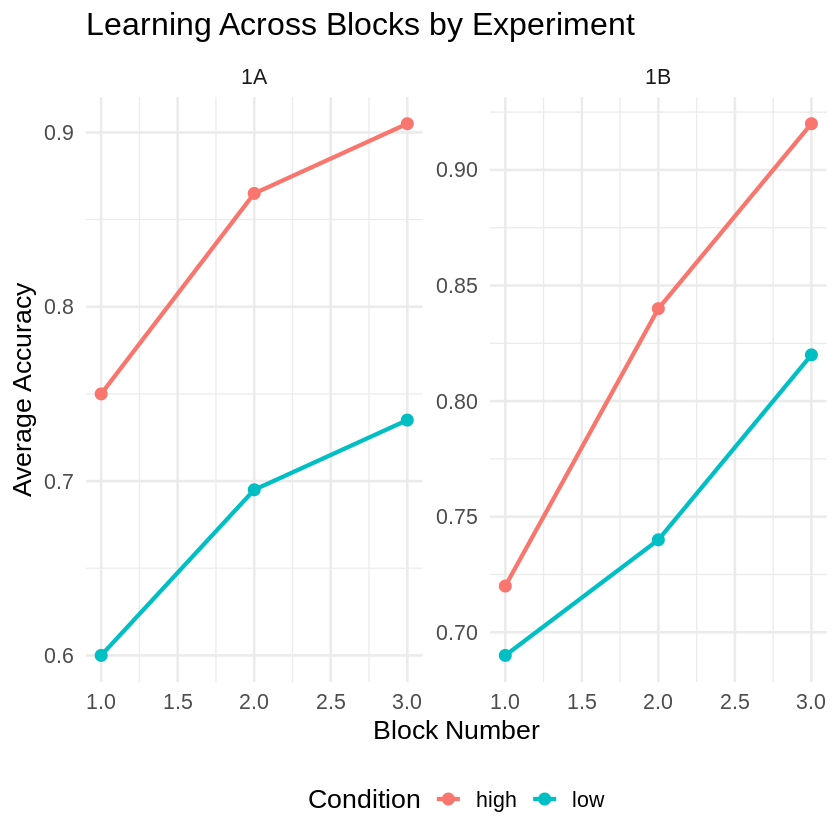

In [14]:
#create a plot showing how average accuracy changes across blocks for each condition in Experiment 1A and in Experiment 1B (separately)
group_summary %>%
  ggplot(aes(x = block_num, y = avg_accuracy, color = condition, group = condition)) +
  geom_line(size = 1.2) +
  geom_point(size = 3) +
  facet_wrap(~ experiment, scales = "free_y") +
  labs(
    title = "Learning Across Blocks by Experiment",
    x = "Block Number",
    y = "Average Accuracy",
    color = "Condition"
  ) +
  theme_minimal(base_size = 16) +
  theme(legend.position = "bottom")

## 2. Wrangling Experiment Data: Typical Critters

Next, we'll work with a second dataset to continue to get comfortable working with experiment data. This time, we'll look at a dataset that retains more of its original JsPsych columns. This will help us learn strategies for cleaning up and organizing JsPsych data.

In this experiment, participants judged how typical a set of images were for four animal categories: birds, cats, dogs, and fish. Each participant judged 16-20 images for 2 categories (e.g., birds and dogs).


### 2.0 Load the data

First, let's load the data and take a closer look. We're storing the data frame in the object `typical_data`.

In case you're curious, you can also view all of the individual images here:
[https://github.com/COGS119/tutorials/tree/main/R/typicality_images](https://github.com/COGS119/tutorials/tree/main/R/typicality_images)

Here's an example of a [typical dog](https://github.com/COGS119/tutorials/blob/main/R/typicality_images/beagle_600x600.jpg).

Here's an example of an [atypical dog](https://github.com/COGS119/tutorials/blob/main/R/typicality_images/afghanhound_600x600.jpg).

In [16]:
#read in the data we'll use
typical_data_all <- read_csv("https://raw.githubusercontent.com/COGS119/tutorials/refs/heads/main/R/typicality_exercise.csv")

Rows: 3034 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): view_history, trial_type, internal_node_id, subject, category, typi...
dbl (6): rt, trial_index, trial_number, time_elapsed, nameability, typicalit...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Let's take a look at the dataset. There are a lot of columns! The dataset is still in a relatively "raw" form, with many of the columns that JsPsych adds to our data by default. This can be very helpful for keeping as much information about what happened during our experiment as possible. BUT, it can also be distracting once we go to analyze our dataset.

In [17]:
#inspect the data - lotta columns!
typical_data_all |>
  View()

view_history,rt,trial_type,trial_index,trial_number,time_elapsed,internal_node_id,subject,category,typicality_condition,image_name,full_image_name,nameability,responses,typicality_rating
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
"[{""page_index"":0,""viewing_time"":8487}]",8488,instructions,0,NA,8522,0.0-0.0,p111327,NA,NA,NA,NA,NA,NA,NA
NA,4485,survey-likert,1,1,13010,0.0-1.0,p111327,cat,typical,britishshorthair,britishshorthair_600x600.jpg,0.9000000,"{""Q0"":3}",4
NA,2554,survey-likert,2,2,15581,0.0-2.0,p111327,cat,typical,burmese,burmese_600x600.jpg,0.9310345,"{""Q0"":2}",3
NA,4636,survey-likert,3,3,20234,0.0-3.0,p111327,cat,atypical,siamese,siamese_600x600.jpg,0.8484848,"{""Q0"":1}",2
NA,12020,survey-likert,4,4,32271,0.0-4.0,p111327,cat,typical,arabianmau,arabianmau_600x600.jpg,0.9000000,"{""Q0"":2}",3
NA,2959,survey-likert,5,5,35247,0.0-5.0,p111327,cat,atypical,siberian,siberian_600x600.jpg,0.8787879,"{""Q0"":2}",3
NA,3049,survey-likert,6,6,38313,0.0-6.0,p111327,cat,atypical,exotic,exotic_600x600.jpg,0.8787879,"{""Q0"":1}",2
NA,3215,survey-likert,7,7,41543,0.0-7.0,p111327,cat,atypical,sphynx,sphynx_600x600.jpg,0.5882353,"{""Q0"":0}",1
NA,2991,survey-likert,8,8,44550,0.0-8.0,p111327,cat,atypical,americancurl,americancurl_600x600.jpg,0.9375000,"{""Q0"":3}",4


Before we move on, let's use two verbs (one old, one new) to clean up the dataset a bit:
- [`filter()`](https://dplyr.tidyverse.org/reference/filter.html): `filter()` can help us keep only the rows we want to analyze further in our dataset. This is helpful for removing JsPsych trial types that we don't need for our analysis (e.g., instruction trials).
- [`select()`](https://): `select()` allows us to keep only the columns that we want to analyze further. This is helpful for removing JsPsych columns that we don't need in our current analysis (e.g., `internal_node_id`).

Here, let's use `filter()` to select only the typicality rating trials (removing instruction trials) and `select()` to keep only the key columns for our analysis. We'll store it in a new data frame, `typical_data`.



In [18]:
#filter and select the data we want to keep
typical_data <- typical_data_all |>
  filter(trial_type == "survey-likert") |>
  select(subject, trial_number,category, typicality_condition,image_name,nameability,typicality_rating)

#take a look at the new data frame
typical_data |>
  View()

subject,trial_number,category,typicality_condition,image_name,nameability,typicality_rating
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
p111327,1,cat,typical,britishshorthair,0.9000000,4
p111327,2,cat,typical,burmese,0.9310345,3
p111327,3,cat,atypical,siamese,0.8484848,2
p111327,4,cat,typical,arabianmau,0.9000000,3
p111327,5,cat,atypical,siberian,0.8787879,3
p111327,6,cat,atypical,exotic,0.8787879,2
p111327,7,cat,atypical,sphynx,0.5882353,1
p111327,8,cat,atypical,americancurl,0.9375000,4
p111327,9,cat,typical,chartreux,0.7931034,3


We now have a data frame with 7 columns:
- **subject:** the unique participant id
- **trial_number:** the trial number for each subject
- **category:** the category the image belongs to (bird, dog, cat, fish)
- **typicality_condition:** the typicality condition for each image (atypical vs. typical), specified by the experimenter. The experimenter selected some images as being more likely to be seen as typical and some as being more likely to be seen as atypical.
- **image_name:** the name of the specific image that participant saw on each trial. See [here](https://github.com/COGS119/tutorials/tree/main/R/typicality_images) for the specific images.
- **nameability:** a specific property of the image, its "nameability" (see below for more details). NOTE: each image has its own nameability value (identical across participants), based on data collected from a *different* experiment.
- **typicality:** participants' rating of the image's typicality, on a scale of 1 (very atypical) to 5 (very typical).

### 2.1. Summarize typicality for each image

Now that we have the data in a more convenient shape, let's create a new **data frame that summarizes the average typicality for each image**.

- in addition to the `image_name`, retain information about the `category`, `typicality_condition`, and `nameability` in your grouping variable
- because every participant judges a given image just once, we **do not** need to group by participant.



In [20]:
#create a data frame that summarizes the average typicality for each image
#keep information about category, typicality_condition, and nameability
typicality_summary <- typical_data |>
  group_by(image_name, category, typicality_condition, nameability) |>
  summarize(avg_typicality = mean(typicality_rating, na.rm = TRUE), .groups = "drop")

print(typicality_summary)

# A tibble: 70 × 5
   image_name   category typicality_condition nameability avg_typicality
   <chr>        <chr>    <chr>                      <dbl>          <dbl>
 1 afghanhound  dog      atypical                   0.788           2.24
 2 americancurl cat      atypical                   0.938           4.17
 3 angelfish    fish     typical                    0.824           3.37
 4 arabianmau   cat      typical                    0.9             4.17
 5 bass         fish     typical                    0.906           4.12
 6 bassethound  dog      atypical                   0.576           2.71
 7 beagle       dog      typical                    0.818           4.51
 8 bengal       cat      typical                    0.833           3.15
 9 betafish     fish     atypical                   0.552           2.73
10 bluegill     fish     typical                    0.882           4.15
# ℹ 60 more rows


### 2.2. Visualize the data

Let's focus in on **just the dog images** (by filtering the data to just the dog category).

Create a bar plot showing the average accuracies for all dog images. Tip: use [`geom_bar(stat="identity")`](https://ggplot2.tidyverse.org/reference/geom_bar.html).

Answer the following questions:

- Which dog image has the highest typicality rating on average?
- Which dog image has the lowest typicality rating on average?

# A tibble: 1 × 5
  image_name     category typicality_condition nameability avg_typicality
  <chr>          <chr>    <chr>                      <dbl>          <dbl>
1 germanshepherd dog      typical                    0.727           4.54
# A tibble: 1 × 5
  image_name category typicality_condition nameability avg_typicality
  <chr>      <chr>    <chr>                      <dbl>          <dbl>
1 sheepdog   dog      atypical                    0.75           1.78


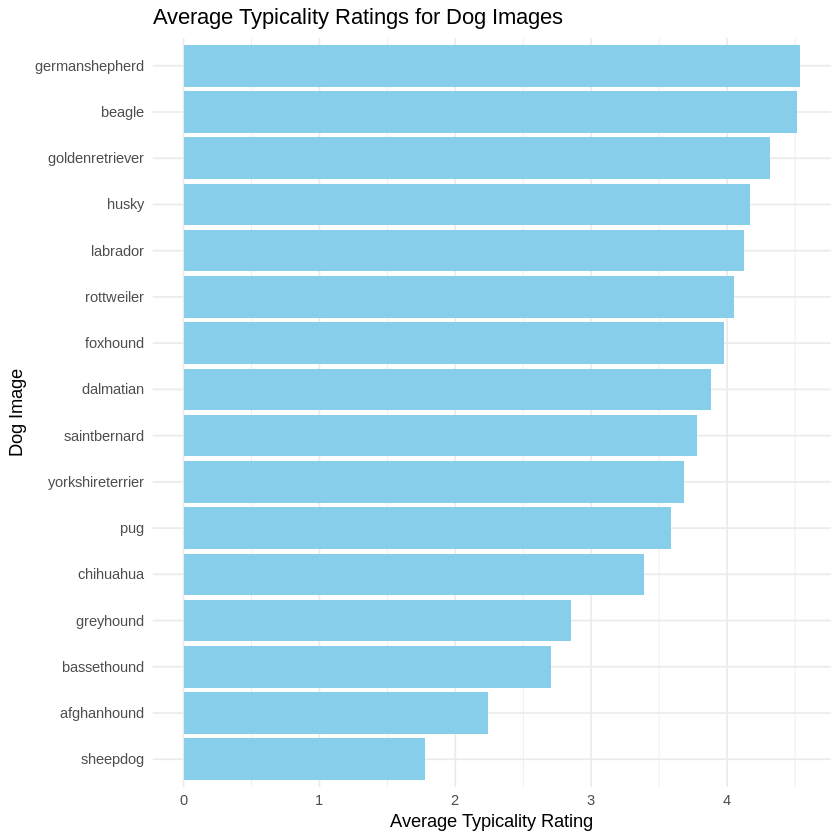

In [22]:
# create a bar plot showing the average accuracies for all dog images.

# Which dog image has the highest typicality rating on average? --> The German Shepherd image has the highest average typicality rating, with a score of 4.54.

# Which dog image has the lowest typicality rating on average? --> The Sheepdog image has the lowest average typicality rating, with a score of 1.78.

dog_data <- typicality_summary |>
  filter(category == "dog")

ggplot(dog_data, aes(x = reorder(image_name, avg_typicality), y = avg_typicality)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +
  labs(
    title = "Average Typicality Ratings for Dog Images",
    x = "Dog Image",
    y = "Average Typicality Rating"
  ) +
  theme_minimal()

highest_typicality <- dog_data |>
  arrange(desc(avg_typicality)) |>
  slice(1)

lowest_typicality <- dog_data |>
  arrange(avg_typicality) |>
  slice(1)

print(highest_typicality)
print(lowest_typicality)

### 2.3. Investigate typicality by condition

Now, let's switch gears and check to see whether our expectations about which images would be more or less typical (`typicality_condition`) matches how people rated our images.

For this part, create a data frame summarizing the average typicality ratings for each condition, so:
- group by typicality condition (only)
- summarize average typicality

What are the average typicality ratings for each condition? Do images between the two conditions differ in typicality ratings the way we would expect?

In [23]:
# create a data frame that summarizes average typicality by typicality_condition
typicality_condition_summary <- typical_data |>
  group_by(typicality_condition) |>
  summarize(avg_typicality = mean(typicality_rating, na.rm = TRUE))

typicality_condition_summary

typicality_condition,avg_typicality
<chr>,<dbl>
atypical,2.760976
typical,3.958188


Summarize average typicality by condition again, but this time let's break down average condition ratings by category (bird, cat, dog, fish). [How can we accomplish this?]

In the code, please also answer the following question:
Which of the four animal categories has the largest different between typical and atypical images? (it's fine to read this off the data frame you computed, but if you can figure out how to compute this in R, bonus!!)

In [24]:
# create a data frame that summarizes average typicality by category and typicality_condition

# Which of the four categories has the largest difference in average rating between typical and atypical conditions?
typicality_by_condition_category <- typical_data |>
  group_by(typicality_condition, category) |>
  summarize(avg_typicality = mean(typicality_rating, na.rm = TRUE))

typicality_by_condition_category

typicality_difference <- typicality_by_condition_category |>
  spread(key = typicality_condition, value = avg_typicality) |>
  mutate(difference = typical - atypical)

typicality_difference

`summarise()` has grouped output by 'typicality_condition'. You can override
using the `.groups` argument.


typicality_condition,category,avg_typicality
<chr>,<chr>,<dbl>
atypical,bird,2.604878
atypical,cat,2.847561
atypical,dog,3.003049
atypical,fish,2.642276
typical,bird,3.924390
typical,cat,3.915989
typical,dog,4.195122
typical,fish,3.810976


category,atypical,typical,difference
<chr>,<dbl>,<dbl>,<dbl>
bird,2.604878,3.924390,1.319512
cat,2.847561,3.915989,1.068428
dog,3.003049,4.195122,1.192073
fish,2.642276,3.810976,1.168699


### 2.4. [BONUS] Relationship between nameability and typicality.

Note: Complete this next section (together with 1.7) to earn .5 extra credit on the assignment!

For each image, we also have information about its "nameability": how much people agree on what to call the image. For example, if everyone names an image in the same way (e.g., everyone calls the image "dog"), then its nameability will be high (close to 1). If everyone names the image in a different way (e.g., one person calls it a "heron", another person calls it a "crane", another person calls it a "bird", etc.), then its nameability will be low (close to 0).

Using the data frame you created in 2.1., let's look at the relationship between nameability and average typicality rating for each image. Can you create a plot that:
- shows points representing nameability (x-axis) and average typicality (y-axis)
- a linear fit showing the relationship (correlation) between nameability and typicality

**Tip:** A quick way to create a linear fit using ggplot is to use [`geom_smooth(method="lm")`](https://ggplot2.tidyverse.org/reference/geom_smooth.html).



In [27]:
# create a plot showing the linear relationship between nameability and average typicality


Next, can you create a plot showing the same linear relationship between nameability and typicality, but this time, show the linear fit separately for the typical and atypical condition?

**Tip:** add a color variable to the `aes()` call, i.e., `aes(....,color=typicality_condition)` to group the data into two different colors. This will also automatically separate the data for `geom_smooth()`.

In [ ]:
# create a plot showing the linear relationship between nameability and average typicality, for each condition